# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib.parse

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
data ={
    'City': [],
    'Lat': [],
    'Lng': [],
    'Max Temp': [],
    'Humidity': [],
    'Cloudiness': [],
    'Wind Speed': [],
    'Country': [],
    'Date': []
}
for i, city in enumerate(cities):
    print(f'{i+1} of 620 Requesting data for {city}',end = '')
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}'
    response = requests.get(url).json()
    try : 
        data['Lat'].append(response['coord']['lat'])
        data['Lng'].append(response['coord']['lon'])
        data['Max Temp'].append(response['main']['temp_max'])
        data['Humidity'].append(response['main']['humidity'])
        data['Cloudiness'].append(response['clouds']['all'])
        data['Wind Speed'].append(response['wind']['speed'])
        data['Country'].append(response['sys']['country'])
        data['Date'].append(response['dt'])
        data['City'].append(city)
        print(' | DONE')
    except : 
        print(' | Not found')
   
cities_df = pd.DataFrame.from_dict(data)


1 of 620 Requesting data for tahe | DONE
2 of 620 Requesting data for kapaa | DONE
3 of 620 Requesting data for east london | DONE
4 of 620 Requesting data for castro | DONE
5 of 620 Requesting data for enumclaw | DONE
6 of 620 Requesting data for monte alegre | DONE
7 of 620 Requesting data for rikitea | DONE
8 of 620 Requesting data for valley city | DONE
9 of 620 Requesting data for sangar | DONE
10 of 620 Requesting data for louisbourg | Not found
11 of 620 Requesting data for cherskiy | DONE
12 of 620 Requesting data for tiksi | DONE
13 of 620 Requesting data for samalaeulu | Not found
14 of 620 Requesting data for butaritari | DONE
15 of 620 Requesting data for norman wells | DONE
16 of 620 Requesting data for klaksvik | DONE
17 of 620 Requesting data for souillac | DONE
18 of 620 Requesting data for illoqqortoormiut | Not found
19 of 620 Requesting data for lebu | DONE
20 of 620 Requesting data for thunder bay | DONE
21 of 620 Requesting data for kaitangata | DONE
22 of 620 Requ

346 of 620 Requesting data for nuuk | DONE
347 of 620 Requesting data for ontario | DONE
348 of 620 Requesting data for meteti | DONE
349 of 620 Requesting data for korla | DONE
350 of 620 Requesting data for aykhal | DONE
351 of 620 Requesting data for wabrzezno | DONE
352 of 620 Requesting data for arlit | DONE
353 of 620 Requesting data for labuhan | DONE
354 of 620 Requesting data for wundanyi | DONE
355 of 620 Requesting data for altay | DONE
356 of 620 Requesting data for kruisfontein | DONE
357 of 620 Requesting data for zhob | DONE
358 of 620 Requesting data for paamiut | DONE
359 of 620 Requesting data for manado | DONE
360 of 620 Requesting data for marzuq | DONE
361 of 620 Requesting data for totoro | DONE
362 of 620 Requesting data for geraldton | DONE
363 of 620 Requesting data for neryungri | DONE
364 of 620 Requesting data for lorengau | DONE
365 of 620 Requesting data for eenhana | DONE
366 of 620 Requesting data for saint george | DONE
367 of 620 Requesting data for na

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
print(f'{len(cities_df)} Cities with Data') 
try:
    cities_df.set_index('City',inplace =True)
except KeyError:
    print('Index already set')
cities_df.to_csv('../output_data/cities.csv')
cities_df.head()


528 Cities with Data


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
tahe,52.3333,124.7333,30.81,84,54,4.25,CN,1619724585
kapaa,22.0752,-159.3190,75.20,69,40,14.97,US,1619724586
east london,-33.0153,27.9116,59.00,94,20,8.05,ZA,1619723987
castro,-24.7911,-50.0119,66.99,49,1,7.67,BR,1619724587
enumclaw,47.2043,-121.9915,71.01,57,100,1.99,US,1619724587


In [6]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,5.280000e+02
mean,18.989679,17.241254,62.682443,68.702652,54.185606,7.288239,1.619725e+09
std,33.850324,90.489380,19.905441,23.769542,38.791072,4.666656,1.152924e+02
min,-54.800000,-175.200000,-1.620000,6.000000,0.000000,0.510000,1.619724e+09
25%,-8.859250,-63.655275,50.000000,56.000000,18.750000,3.755000,1.619725e+09
50%,21.706500,21.974450,66.990000,74.000000,65.000000,6.710000,1.619725e+09
75%,48.361475,99.040650,78.392500,88.000000,91.250000,9.220000,1.619725e+09
max,78.218600,179.316700,101.120000,100.000000,100.000000,35.680000,1.619725e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
cities_df[cities_df['Humidity']>100]

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,


In [8]:
#  Get the indices of cities that have humidity over 100%.
cities_df[cities_df['Humidity']>100].index

Index([], dtype='object', name='City')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

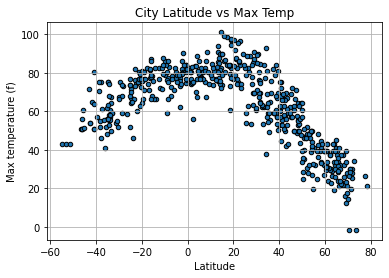

In [28]:
cities_df.plot(kind='scatter',x='Lat',y='Max Temp',edgecolors='black')
plt.title('City Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (f)')
plt.grid()
plt.savefig('../output_data/lat_VS_maxTemp.jpg')

# Analysis
In this plot you can see the expected behavior, the closer you are to the Equator the higher the temperature is.
But you also can observe that is not symmetrical at 60 and -60 have different temperatures; and the maximum temperature is around 20+. 
with this you can infer that the planet is tilted with an angle close to 20+ Degrees.

## Latitude vs. Humidity Plot

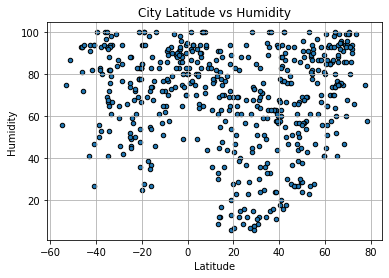

In [29]:
cities_df.plot(kind='scatter',x='Lat',y='Humidity',edgecolors='black')
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig('../output_data/lat_VS_Humidity.jpg')
plt.show()

# Analysis
In this plot you can observed that they are much more variation on the positive latitudes than in the negative ones.
you can also see a gap for low Humidity between -20 and 0; when you look a map in these coordinates you can observe that they correspond to countries like Brazil, Kongo Indonesia among others.

## Latitude vs. Cloudiness Plot

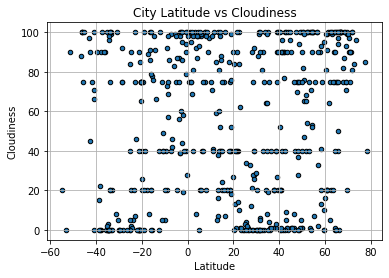

In [30]:
cities_df.plot(kind='scatter',x='Lat',y='Cloudiness',edgecolors='black')
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig('../output_data/lat_VS_cloudiness.jpg')
plt.show()

# Analysis 
This plot is interesting because the data all over the place. you can some trends in 20 and 40 cloudiness. but would attribute this to the low density of the measurements more than a relationship among Latitude and cloudiness.


## Latitude vs. Wind Speed Plot

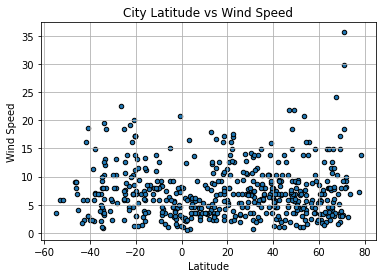

In [31]:
cities_df.plot(kind='scatter',x='Lat',y='Wind Speed',edgecolors='black')
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig('../output_data/lat_VS_windSpeed.jpg')
plt.show()

# Analysis
In this plot you can observe that in general is more common to have higher wind speeds the farther away from the Equator you are.

## Linear Regression

In [32]:
northern_cities = cities_df[cities_df['Lat']>0]
southern_cities = cities_df[cities_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.8726817686729642


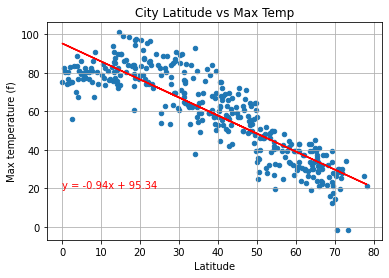

In [33]:
northern_cities.plot(kind='scatter',x='Lat',y='Max Temp')
plt.title('City Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (f)')
plt.grid()
theta = linregress(northern_cities['Lat'],northern_cities['Max Temp'])
print(f'The r-value is : {theta.rvalue}')
line = theta.slope*northern_cities['Lat']+theta.intercept
plt.plot(northern_cities['Lat'],line,c ='r')
line_eq = f'y = {round(theta.slope,2)}x + {round(theta.intercept,2)}'
plt.annotate(line_eq,(0,20),c='r')
plt.savefig('../output_data/northLat_VS_maxTemp.jpg')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.7371928321464308


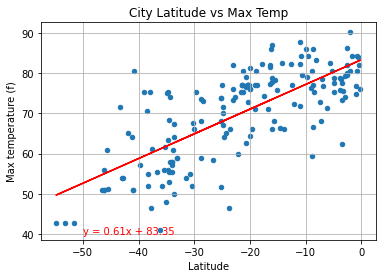

In [34]:
southern_cities.plot(kind='scatter',x='Lat',y='Max Temp')
plt.title('City Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (f)')
plt.grid()
theta = linregress(southern_cities['Lat'],southern_cities['Max Temp'])
print(f'The r-value is : {theta.rvalue}')
line = theta.slope*southern_cities['Lat']+theta.intercept
plt.plot(southern_cities['Lat'],line,c ='r')
line_eq = f'y = {round(theta.slope,2)}x + {round(theta.intercept,2)}'
plt.annotate(line_eq,(-50,40),c='r')
plt.savefig('../output_data/southLat_VS_maxTemp.jpg')
plt.show()

# Analysis
with the trend lines across the last two plots you can observed that the closer to the equator the higher the temperature; and you can also observe that the trend line is moved upwards in the southern hemisphere.
Also with the r-value you can see a good correlation for the data and trend line.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.16864016258211212


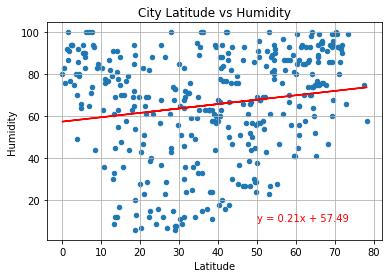

In [35]:
northern_cities.plot(kind='scatter',x='Lat',y='Humidity')
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
theta = linregress(northern_cities['Lat'],northern_cities['Humidity'])
print(f'The r-value is : {theta.rvalue}')
line = theta.slope*northern_cities['Lat']+theta.intercept
plt.plot(northern_cities['Lat'],line,c ='r')
line_eq = f'y = {round(theta.slope,2)}x + {round(theta.intercept,2)}'
plt.annotate(line_eq,(50,10),c='r')
plt.savefig('../output_data/northLat_VS_humidity.jpg')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.046917897060224006


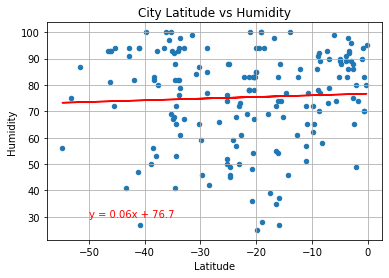

In [36]:
southern_cities.plot(kind='scatter',x='Lat',y='Humidity')
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
theta = linregress(southern_cities['Lat'],southern_cities['Humidity'])
print(f'The r-value is : {theta.rvalue}')
line = theta.slope*southern_cities['Lat']+theta.intercept
plt.plot(southern_cities['Lat'],line,c ='r')
line_eq = f'y = {round(theta.slope,2)}x + {round(theta.intercept,2)}'
plt.annotate(line_eq,(-50,30),c='r')
plt.savefig('../output_data/southLat_VS_humidity.jpg')
plt.show()

# Analysis
In general, we can see that the latitude has poor correlation with the humidity. 
but we can observe that there is trend for the cities to be in places with high humidity; most of the data is has values above 20% humidity with the northern hemisphere having more cities in places with lower humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.12047639204206104


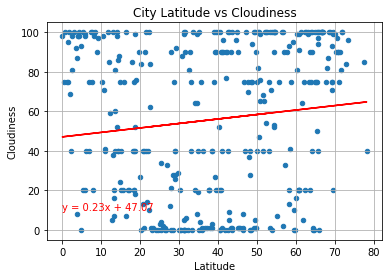

In [37]:
northern_cities.plot(kind='scatter',x='Lat',y='Cloudiness')
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
theta = linregress(northern_cities['Lat'],northern_cities['Cloudiness'])
print(f'The r-value is : {theta.rvalue}')
line = theta.slope*northern_cities['Lat']+theta.intercept
plt.plot(northern_cities['Lat'],line,c ='r')
line_eq = f'y = {round(theta.slope,2)}x + {round(theta.intercept,2)}'
plt.annotate(line_eq,(0,10),c='r')
plt.savefig('../output_data/northLat_VS_cloudiness.jpg')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.1421271588953497


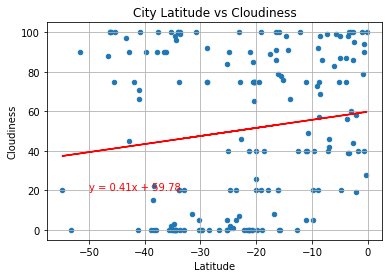

In [38]:
southern_cities.plot(kind='scatter',x='Lat',y='Cloudiness')
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
theta = linregress(southern_cities['Lat'],southern_cities['Cloudiness'])
print(f'The r-value is : {theta.rvalue}')
line = theta.slope*southern_cities['Lat']+theta.intercept
plt.plot(southern_cities['Lat'],line,c ='r')
line_eq = f'y = {round(theta.slope,2)}x + {round(theta.intercept,2)}'
plt.annotate(line_eq,(-50,20),c='r')
plt.savefig('../output_data/southLat_VS_cludiness.jpg')
plt.show()

# Analysis
There is a low correlation between Cloudiness and latitude. but can observe more cloudiness in general in the northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.1029268870400224


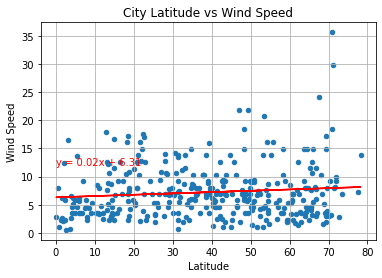

In [39]:
northern_cities.plot(kind='scatter',x='Lat',y='Wind Speed')
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
theta = linregress(northern_cities['Lat'],northern_cities['Wind Speed'])
print(f'The r-value is : {theta.rvalue}')
line = theta.slope*northern_cities['Lat']+theta.intercept
plt.plot(northern_cities['Lat'],line,c ='r')
line_eq = f'y = {round(theta.slope,2)}x + {round(theta.intercept,2)}'
plt.annotate(line_eq,(0,12),c='r')
plt.savefig('../output_data/northLat_VS_windSpeed.jpg')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.08048107352558777


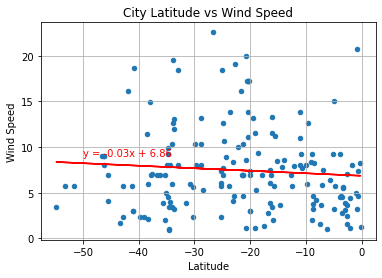

In [40]:
southern_cities.plot(kind='scatter',x='Lat',y='Wind Speed')
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
theta = linregress(southern_cities['Lat'],southern_cities['Wind Speed'])
print(f'The r-value is : {theta.rvalue}')
line = theta.slope*southern_cities['Lat']+theta.intercept
plt.plot(southern_cities['Lat'],line,c ='r')
line_eq = f'y = {round(theta.slope,2)}x + {round(theta.intercept,2)}'
plt.annotate(line_eq,(-50,9),c='r')
plt.savefig('../output_data/southLat_VS_windSpeed.jpg')
plt.show()

# Analysis

There is a low correlation between Wind Speed and latitude. Meaby adding an phter axis like time colud help us get a more relevant Analysis.
